### Questions
- Level up at end of lab
    - How does scaling affect KNN?

### Objectives
YWBAT 
* code KNN using sklearn
* evaluate it using a confusion matrix
* apply evaluation metrics to a KNN model
* explain use cases for different evaluation metrics

### Outline
- List Objectives
- Take Questions
- Use Sklearn KNN
- Plot Confusion Matrix
- Discuss Various Metrics
- Write 3-5 sentences on what you learned.

In [9]:
import pandas as pd
import numpy as np

from sklearn.metrics import confusion_matrix, r2_score, recall_score, f1_score, precision_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

In [21]:
# Distance Metrics
def minkowski(v1, v2, p):
    # distance metrics based on p
    # kth root of the sum of distances raised to the pth value
    distance = 0
    for i in range(len(v1)):
        distance += np.abs(v1[i]-v2[i])**p
    distance = np.power(distance, 1/p)
    return distance


def minkowski_np(v1, v2, p):
    sum_distance = np.sum(np.abs(v1 - v2)**p)
    distance = np.power(sum_distance, 1/p)
    return distance

In [22]:
v1 = np.array([0, 0])
v2 = np.array([3, 4])
v3 = np.array([2, 4.5])

In [25]:
minkowski(v1, v2, 1), minkowski_np(v1, v2, 1)

(7.0, 7.0)

In [27]:
for p in np.linspace(1, 5, 9):
    print("p = {}".format(p))
    # comparing d1 and d2
    print("d1 = {}".format(minkowski(v1, v2, p))) # is one always smaller
    print("d2 = {}".format(minkowski(v1, v3, p)))
    print("-"*20)

p = 1.0
d1 = 7.0
d2 = 6.5
--------------------
p = 1.5
d1 = 5.584250376480029
d2 = 5.349937402825397
--------------------
p = 2.0
d1 = 5.0
d2 = 4.924428900898052
--------------------
p = 2.5
d1 = 4.688140842343588
d2 = 4.728278858112068
--------------------
p = 3.0
d1 = 4.497941445275415
d2 = 4.628011187371595
--------------------
p = 3.5
d1 = 4.372215289689355
d2 = 4.573727528347276
--------------------
p = 4.0
d1 = 4.284572294953817
d2 = 4.5432677064496225
--------------------
p = 4.5
d1 = 4.221163518110637
d2 = 4.52575314162099
--------------------
p = 5.0
d1 = 4.174027662897746
d2 = 4.515500227570816
--------------------


### why is knowing that distance can change for various p important?
- to help pick the best p for the dataset

In [28]:
data = make_blobs(n_samples=500, n_features=2, cluster_std=4.0, centers=2)
points, labels = data

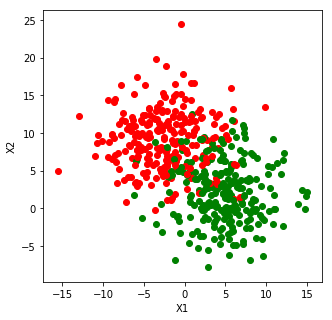

In [29]:
plt.figure(figsize=(5, 5))
color_dict = {0: 'r', 1: 'g'}
for p, l in zip(points, labels):
    plt.scatter(p[0], p[1], c=color_dict[l])
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

In [37]:
xtrain, xtest, ytrain, ytest = train_test_split(points, labels, train_size=0.70)

In [43]:
dlist = []
for p in np.linspace(1, 5, 9):
    for n in [2, 3, 4, 5, 6, 7]:
        d = {}
        print("p = {}, n = {}".format(p, n))
        d["p"] = p
        d["n"] = n
        knn = KNeighborsClassifier(n_neighbors=n, p=p)
        knn.fit(xtrain, ytrain)
        score = knn.score(xtest, ytest)
        print(score) # accuracy score
        d["score"] = score
        dlist.append(d)
        print("-"*50)

p = 1.0, n = 2
0.8866666666666667
--------------------------------------------------
p = 1.0, n = 3
0.8733333333333333
--------------------------------------------------
p = 1.0, n = 4
0.8933333333333333
--------------------------------------------------
p = 1.0, n = 5
0.8733333333333333
--------------------------------------------------
p = 1.0, n = 6
0.8866666666666667
--------------------------------------------------
p = 1.0, n = 7
0.8933333333333333
--------------------------------------------------
p = 1.5, n = 2
0.88
--------------------------------------------------
p = 1.5, n = 3
0.88
--------------------------------------------------
p = 1.5, n = 4
0.9066666666666666
--------------------------------------------------
p = 1.5, n = 5
0.9
--------------------------------------------------
p = 1.5, n = 6
0.8866666666666667
--------------------------------------------------
p = 1.5, n = 7
0.8933333333333333
--------------------------------------------------
p = 2.0, n = 2
0.88
---

In [44]:
dlist

[{'p': 1.0, 'n': 2, 'score': 0.8866666666666667},
 {'p': 1.0, 'n': 3, 'score': 0.8733333333333333},
 {'p': 1.0, 'n': 4, 'score': 0.8933333333333333},
 {'p': 1.0, 'n': 5, 'score': 0.8733333333333333},
 {'p': 1.0, 'n': 6, 'score': 0.8866666666666667},
 {'p': 1.0, 'n': 7, 'score': 0.8933333333333333},
 {'p': 1.5, 'n': 2, 'score': 0.88},
 {'p': 1.5, 'n': 3, 'score': 0.88},
 {'p': 1.5, 'n': 4, 'score': 0.9066666666666666},
 {'p': 1.5, 'n': 5, 'score': 0.9},
 {'p': 1.5, 'n': 6, 'score': 0.8866666666666667},
 {'p': 1.5, 'n': 7, 'score': 0.8933333333333333},
 {'p': 2.0, 'n': 2, 'score': 0.88},
 {'p': 2.0, 'n': 3, 'score': 0.88},
 {'p': 2.0, 'n': 4, 'score': 0.9133333333333333},
 {'p': 2.0, 'n': 5, 'score': 0.8933333333333333},
 {'p': 2.0, 'n': 6, 'score': 0.9},
 {'p': 2.0, 'n': 7, 'score': 0.8933333333333333},
 {'p': 2.5, 'n': 2, 'score': 0.88},
 {'p': 2.5, 'n': 3, 'score': 0.8866666666666667},
 {'p': 2.5, 'n': 4, 'score': 0.9133333333333333},
 {'p': 2.5, 'n': 5, 'score': 0.88},
 {'p': 2.5, 'n

In [45]:
knn = KNeighborsClassifier(n_neighbors=5, p=1.5)
knn.fit(xtrain, ytrain)

# what does the 'fit' method do in KNN?
# just labels the points

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=1.5,
                     weights='uniform')

In [46]:
knn.score(xtest, ytest)

0.9

In [48]:
# plot a confusion matrix
ytest_pred = knn.predict(xtest)
cm = confusion_matrix(ytest, ytest_pred)

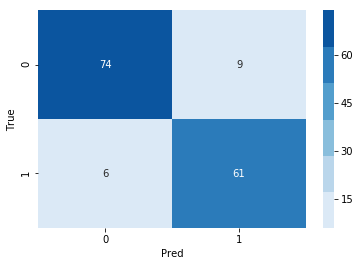

In [49]:
sns.heatmap(cm, annot=True, cmap=sns.color_palette('Blues'))
plt.xlabel("Pred")
plt.ylabel("True")
plt.show()

### how do we evaluate?

#### Precision

$$\frac{TP}{TP+FP}$$

When do we use precision?
- When we want to lower False Positive Rate
- Credit Checks 
- Life Vest Safety
- Safety Metrics (Life Vest, Air bags, seat belts, car seats, laundry soap, cabinet locks, ....)
- Quality Assurance
- Don't mind False Negatives

#### Accuracy

$$\frac{TP+TN}{\sum}$$

- When do we use accuracy?
- Spam Mail
    - It's better to send email to junk than miss an important email

#### Recall 
$$\frac{TP}{TP+FN}$$

When do we use precision?
- When we want to lower False Negative Rate
- Disease/Cancer/Medical/Sickness...
- Don't mind False Positives


#### F1 - Harmonic Mean

$$\frac{2\times P \times R}{P + R}$$

When do we use F1?
- When we want to lower FP and FN

### How do we make a threshold?

In [50]:
probs = knn.predict_proba(xtest)
probs[:3]

array([[1. , 0. ],
       [0.2, 0.8],
       [1. , 0. ]])

In [51]:
def get_labels(knn, xtest, thresh=0.5):
    probs = knn.predict_proba(xtest)
    labels = []
    for scores in probs:
        if scores[1] >= thresh:
            labels.append(1)
        else:
            labels.append(0)
    return np.array(labels)

In [63]:
ytest_preds = get_labels(knn, xtest, thresh=0.30)
cm = confusion_matrix(ytest, ytest_preds)

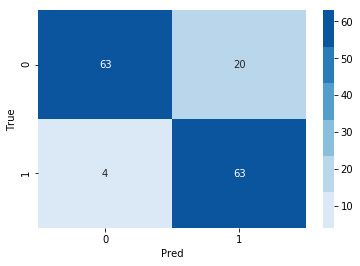

In [64]:
sns.heatmap(cm, annot=True, cmap=sns.color_palette('Blues'))
plt.xlabel("Pred")
plt.ylabel("True")
plt.show()

### Assessment/What did we learn?

In [81]:
col0 = data[0][:, 0]+10
col1 = np.log(data[0][:, 1]+10)
new_data = np.column_stack([col0, col1])
new_data

array([[ 5.57410543,  2.90535069],
       [ 1.43003813,  3.1979293 ],
       [ 3.5920757 ,  3.09840729],
       [ 6.97913201,  2.72077716],
       [10.84228328,  3.11363521],
       [ 1.35434569,  3.18324837],
       [ 4.75330084,  2.17311273],
       [15.73379408,  3.25946673],
       [12.20856286,  2.84127392],
       [12.95913157,  2.38379923],
       [ 3.06546248,  2.65531444],
       [21.30177661,  2.77450251],
       [12.14345739,  2.94734099],
       [10.74090567,  3.19619029],
       [15.79897826,  3.0093774 ],
       [18.57716843,  2.40849475],
       [16.06657873,  3.07037406],
       [17.1710063 ,  3.04718276],
       [10.78098203,  2.6483647 ],
       [13.25589553,  2.58556896],
       [11.54472204,  1.9451314 ],
       [ 7.74792245,  2.68807244],
       [ 7.67308974,  2.797762  ],
       [18.38259241,  2.83670079],
       [13.18542999,  2.46346058],
       [ 9.83823075,  3.32417625],
       [12.09033033,  2.81715784],
       [19.44473452,  2.33610383],
       [14.07067323,

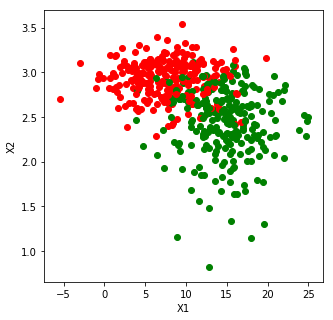

In [82]:
plt.figure(figsize=(5, 5))
color_dict = {0: 'r', 1: 'g'}
for p, l in zip(new_data, labels):
    plt.scatter(p[0], p[1], c=color_dict[l])
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

In [88]:
xtrain, xtest, ytrain, ytest = train_test_split(new_data, labels, train_size=0.70)

In [89]:
knn = KNeighborsClassifier()
knn.fit(xtrain, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [90]:
knn.score(xtest, ytest)

0.8866666666666667